# 1. Training a Neural Network with PyTorch

Now that you've learned the key components of a neural network, you'll train one using a training loop. You'll explore potential issues like vanishing gradients and learn strategies to address them, such as alternative activation functions and tuning learning rate and momentum. 

## 1.1 Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.2 User Variables

In [2]:
animals = pd.read_csv("../datasets/animals.csv")
animals.head(2)

,animal_name,hair,feathers,eggs,milk,predator,legs,tail,type
0,sparrow,0,1,1,0,0,2,1,0
1,eagle,0,1,1,0,1,2,1,0


In [3]:
dataloader_df = pd.read_csv("../datasets/dataloader_1.csv")
dataloader_df.head(2)

,0,1,2,3,4
0,1.0,0.0,1.0,1.0,0.109915
1,3.0,0.0,1.0,1.0,0.360000


# 2. Exercises

## 2.1 Using TensorDataset

### Description

Structuring your data into a dataset is one of the first steps in training a PyTorch neural network. ``TensorDataset`` simplifies this by converting NumPy arrays into a format PyTorch can use.

In this exercise, you'll create a ``TensorDataset`` using the preloaded ``animals`` dataset and inspect its structure.

### Instructions

* Convert ``X`` and ``y`` into tensors and create a ``TensorDataset``.
* Access and print the first sample.

In [4]:
import torch
from torch.utils.data import TensorDataset

X = animals.iloc[:, 1:-1].to_numpy()  
y = animals.iloc[:, -1].to_numpy()

# Create a dataset
dataset = TensorDataset(torch.tensor(X), torch.tensor(y))

# Print the first sample
input_sample, label_sample = dataset[0]
print('Input sample:', input_sample)
print('Label sample:', label_sample)

Input sample: tensor([0, 1, 1, 0, 0, 2, 1])
Label sample: tensor(0)


In [5]:
X

array([[0, 1, 1, 0, 0, 2, 1],
       [0, 1, 1, 0, 1, 2, 1],
       [1, 0, 0, 1, 1, 4, 1],
       [1, 0, 0, 1, 0, 4, 1],
       [0, 0, 1, 0, 1, 4, 1]])

In [6]:
y

array([0, 0, 1, 1, 2])

In [7]:
dataset[0]

(tensor([0, 1, 1, 0, 0, 2, 1]), tensor(0))

## 2.2 Using DataLoader

### Description

The ``DataLoader`` class is essential for efficiently handling large datasets. It speeds up training, optimizes memory usage, and stabilizes gradient updates, making deep learning models more effective.

Now, you'll create a PyTorch ``DataLoader`` using the ``dataset`` from the previous exercise and see it in action.

### Instructions

* Import the required module.
* Create a ``DataLoader`` using ``dataset``, setting a batch size of two and enabling shuffling.
* Iterate through the ``DataLoader`` and print each batch of inputs and labels.

In [8]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(
                dataset,
                batch_size = 2,
                shuffle=True
            )

# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print('batch_inputs:', batch_inputs)
    print('batch_labels:', batch_labels)

batch_inputs: tensor([[0, 0, 1, 0, 1, 4, 1],
        [0, 1, 1, 0, 0, 2, 1]])
batch_labels: tensor([2, 0])
batch_inputs: tensor([[1, 0, 0, 1, 0, 4, 1],
        [0, 1, 1, 0, 1, 2, 1]])
batch_labels: tensor([1, 0])
batch_inputs: tensor([[1, 0, 0, 1, 1, 4, 1]])
batch_labels: tensor([1])


## 2.3 Using the MSELoss

### Description

For regression problems, you often use Mean Squared Error (MSE) as a loss function instead of cross-entropy. MSE calculates the squared difference between predicted values (``y_pred``) and actual values (``y``). Now, you'll compute MSE loss using both NumPy and PyTorch.

``torch``, ``numpy`` (as ``np``), and ``torch.nn`` (as ``nn``) packages are already imported.

### Instructions

* Calculate the MSE loss using NumPy.
* Create an MSE loss function using PyTorch.
* Convert ``y_pred`` and ``y`` to tensors, then calculate the MSE loss as ``mse_pytorch``.

In [9]:
y_pred = np.array([3, 5.0, 2.5, 7.0])  
y = np.array([3.0, 4.5, 2.0, 8.0])     

# Calculate MSE using NumPy
mse_numpy = np.mean((y_pred - y)**2)

# Create the MSELoss function in PyTorch
criterion = nn.MSELoss()

# Calculate MSE using PyTorch
mse_pytorch = criterion(torch.tensor(y_pred), torch.tensor(y))

print("MSE (NumPy):", mse_numpy)
print("MSE (PyTorch):", mse_pytorch)

MSE (NumPy): 0.375
MSE (PyTorch): tensor(0.3750, dtype=torch.float64)


### Practice: Manual functions

In [10]:
# MSE
def mean_squared_loss(prediction, target):
    import numpy as np
    return np.mean((prediction - target)**2)

## 2.4 Writing a training loop

### Description

In ``scikit-learn``, the training loop is wrapped in the ``.fit()`` method, while in PyTorch, it's set up manually. While this adds flexibility, it requires a custom implementation.

In this exercise, you'll create a loop to train a model for salary prediction.

The ``show_results()`` function is provided to help you visualize some sample predictions.

The package imports provided are: pandas as ``pd``, ``torch``, ``torch.nn`` as ``nn``, ``torch.optim`` as ``optim``, as well as ``DataLoader`` and ``TensorDataset`` from ``torch.utils.data``.

The following variables have been created: ``num_epochs``, containing the number of epochs (set to 5); ``dataloader``, containing the dataloader; ``model``, containing the neural network; ``criterion``, containing the loss function, ``nn.MSELoss()``; ``optimizer``, containing the SGD optimizer.

### Notes

* Use `dataloader.__dict__` to understand the parameters like batch size used in DataCamp

### Instructions

* Write a for loop that iterates over the ``dataloader``; this should be nested within a for loop that iterates over a range equal to the number of epochs.
* Set the gradients of the optimizer to zero.
* Compute the loss using the ``criterion()`` function and the gradients.
* Update the model's parameters.

In [11]:
def show_results(model, dataloader):
    model.eval()
    iter_loader = iter(dataloader)
    for _ in range(3):
        feature, target = next(iter_loader)
        preds = model(feature)
    
        for p, t in zip(preds, target):
            print(f'Ground truth salary: {t.item():.3f}. Predicted salary: {p.item():.3f}.')

In [12]:
# Variables

num_epochs = 5

dataloader = DataLoader(
                dataset,
                batch_size = 2,
                shuffle=True
            )

model = nn.Sequential(
  nn.Linear(4, 2),
  nn.Sigmoid(),
  nn.Linear(2, 1)
)

optimizer = optim.SGD(model.parameters(), lr=0.001)

In [13]:
def create_datarows_from_dataloader(dataloader):
    # Prepare a list to hold converted data rows
    data_rows = []

    # Iterate over batches in the DataLoader
    for batch in dataloader:
        # Each element in batch could be a tensor; convert components to numpy arrays
        # If batch is a tensor, convert entire batch to numpy arrays row-wise
        # If batch is a tuple (e.g. inputs, labels), convert each separately
        if isinstance(batch, torch.Tensor):
            # Convert tensor batch to numpy and iterate rows
            for row in batch.numpy():
                data_rows.append(row)
        elif isinstance(batch, (list, tuple)):
            # Convert each tensor component in the tuple to numpy arrays
            # Combine them row-wise as needed (example for inputs and labels)
            inputs, labels = batch
            inputs_np = inputs.numpy()
            labels_np = labels.numpy()
            for i in range(len(inputs_np)):
                row = list(inputs_np[i]) + list(labels_np[i])  # concatenate as a row
                data_rows.append(row)

    return data_rows

In [ ]:
X = dataloader_df.iloc[:, :-1].to_numpy()  
y = dataloader_df.iloc[:, -1].to_numpy()

# Create a dataset
dataset = TensorDataset(torch.from_numpy(X).float(), torch.from_numpy(y).float()) # To ensure that its float32 (Tensor Float), not float64 (Tensor Double), else it will cause a mismatch in model(feature) line
# Create a DataLoader
dataloader = DataLoader(dataset, batch_size = 4, shuffle=True)

In [15]:
# Loop over the number of epochs and the dataloader
for i in range(num_epochs):
  for data in dataloader:
    # Set the gradients to zero
    optimizer.zero_grad()
    # Run a forward pass
    feature, target = data
    prediction = model(feature)    
    # Compute the loss
    loss = criterion(prediction, target)    
    # Compute the gradients
    loss.backward()
    # Update the model's parameters
    optimizer.step()
show_results(model, dataloader)

c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Ground truth salary: 0.117. Predicted salary: 0.274.
Ground truth salary: 0.108. Predicted salary: 0.277.
Ground truth salary: 0.687. Predicted salary: 0.268.
Ground truth salary: 0.151. Predicted salary: 0.272.
Ground truth salary: 0.129. Predicted salary: 0.287.
Ground truth salary: 0.116. Predicted salary: 0.270.
Ground truth salary: 0.211. Predicted salary: 0.272.
Ground truth salary: 0.373. Predicted salary: 0.276.
Ground truth salary: 0.250. Predicted salary: 0.272.
Ground truth salary: 0.233. Predicted salary: 0.272.
Ground truth salary: 0.383. Predicted salary: 0.272.
Ground truth salary: 0.196. Predicted salary: 0.292.


## 2.5 Implementing ReLU

### Description

The Rectified Linear Unit (ReLU) is a widely-used activation function in deep learning, solving challenges like the vanishing gradients problem.

In this exercise, you'll implement ReLU in PyTorch, apply it to both positive and negative values, and observe the results.

``torch.nn`` package has already been imported for you as nn.

### Notes

![ReLU](../images/relu.png) ![Limitations of Activation Functions](../images/sigmoid_and_softmax_limitations.png)
![Choosing Activation Functions](../images/relu_sigmoid_softmax.png)

### Instructions

* Create a ReLU function in PyTorch.
* Apply the ReLU function to both ``x_pos`` and ``x_neg``.

In [16]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

x_pos = torch.tensor(2.0)
x_neg = torch.tensor(-3.0)

# Apply the ReLU function to the tensors
output_pos = relu_pytorch(x_pos)
output_neg = relu_pytorch(x_neg)

print("ReLU applied to positive value:", output_pos)
print("ReLU applied to negative value:", output_neg)

ReLU applied to positive value: tensor(2.)
ReLU applied to negative value: tensor(0.)


## 2.6 Implementing leaky ReLU

### Description

While ReLU is widely used, it sets negative inputs to 0, resulting in null gradients for those values. This can prevent parts of the model from learning.

Leaky ReLU overcomes this by allowing small gradients for negative inputs, controlled by the ``negative_slope`` parameter. Instead of 0, negative inputs are scaled by this small value, keeping the model's learning active.

In this exercise, you will implement the leaky ReLU function in PyTorch and practice using it. ``torch`` package as well as the ``torch.nn`` as ``nn`` have already been imported.

### Notes

![Leaky ReLU](../images/leaky_relu_1.png)
![Leaky ReLU](../images/leaky_relu.png)
![Leaky ReLU](../images/leaky_relu_2.png)
![Dead Neuron Problem](../images/dead_neuron.png)

### Instructions

* Create a leaky ReLU function in PyTorch with a negative slope of 0.05.
* Call the function on the tensor ``x``, which has already been defined for you.

In [17]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


In [18]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-3.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1500)


### Quiz:

For a negative slope of 0.05 and an input value of -3, what is the output of the leaky ReLU function?

### Answer

`-0.150`


## 2.7 Quiz: Understanding activation functions

### Description

You've learned all about ReLU vs. leaky ReLU. 

### Instructions

Which two of the following statements are True?

### Answer

1. The ReLU activation function outputs zero for negative inputs. [X]
2. Sigmoid activation functions are often found after each linear layer in a network.
3. ReLU(x) = 3 for x = 3. [X]
4. Leaky ReLU outputs the same constant value for negative inputs.

## 2.8 Experimenting with learning rate

### Description

In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function:

x<sup>4</sup> + x<sup>3</sup> - 5x<sup>2</sup> in ten steps.

You will experiment with three different learning rate values. For this problem, try learning rate values between 0.001 to 0.1.

You are provided with the ``optimize_and_plot()`` function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.

### Notes

![SGD](../images/SGD_1.png)
![SGD](../images/SGD_2.png)
![SGD](../images/SGD_3.png)
![SGD](../images/SGD_4.png)
![SGD](../images/SGD_5.png)
### Instructions

* Without momentum: Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right. Try a large learning rate value such that the optimizer skips past the global minimum at -2.
* With momemtum: Based on the previous results, try a better learning rate value.

In [22]:
def function(x):
    return x**4 + x**3 - 5*x**2

In [ ]:
def optimize_and_plot(lr=0.01, momentum=0.0):
    import matplotlib.pyplot as plt

    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []
    for i in range(10):
        y = function(x)
        values.append((x.clone(), y.clone()))
        y.backward()
        
        d_p = x.grad.data
        if momentum !=0 :
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer
        
        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()
    
    x = np.arange(-3, 2, 0.001)
    y = function(x)
    
    plt.figure(figsize=(10, 5))
    plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', linewidth=2, markersize=7)
    
    for i in range(10):
        # plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'}) # RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
        plt.text(values[i][0].detach().item() + 0.1, values[i][1].detach().item(), f'step {i}', fontdict={'color': 'r'})    
    
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['Optimizer steps', 'Square function'])
    plt.show()


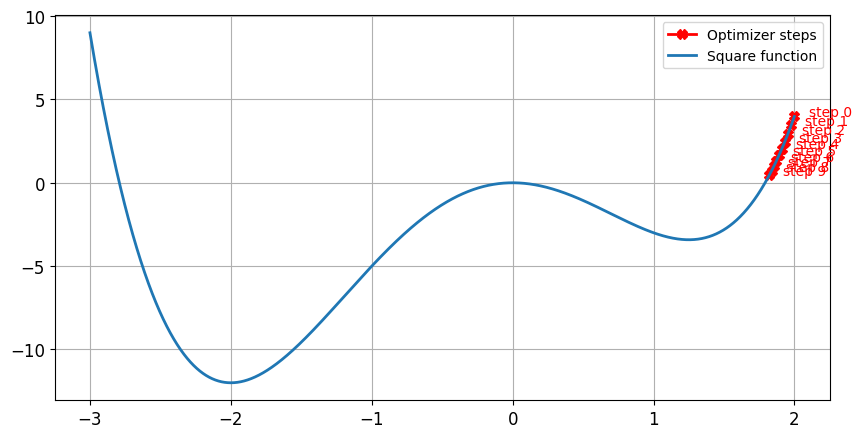

In [26]:
# Try a first learning rate value
lr0 = 0.001
optimize_and_plot(lr=lr0)

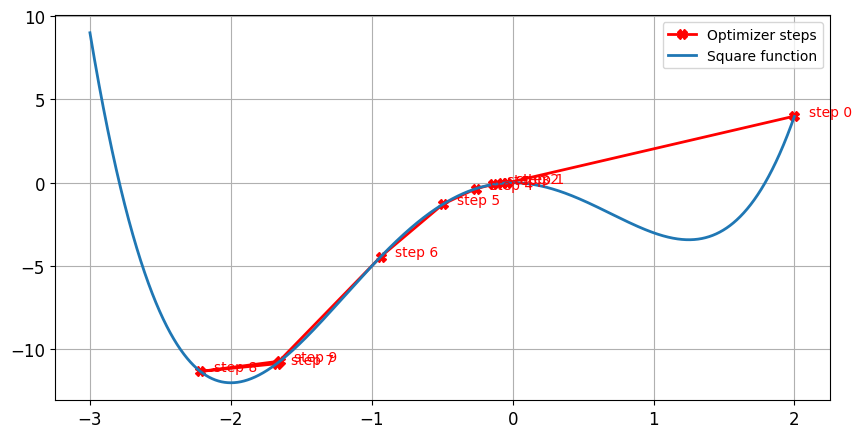

In [27]:
# Try a third learning rate value
lr2 = 0.085 # values between 0.08 and 0.89
optimize_and_plot(lr=lr2)

A learning rate around ``0.09`` gets you closest to the global minimum.

## 2.9 Experimenting with momentum

### Description

In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function 
 in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at 0.01.

You are provided with the optimize_and_plot() function that accepts as input the momentum parameter. This function will run 20 steps of the SGD optimizer and display the results.

### Notes

![Without Momentum](../images/without_momentum.png)
![With Momentum](../images/with_momentum.png)
![Learning Rate vs Momentum](../images/lr_momentum.png)


### Instructions

* Try a first value for the momentum such that the optimizer gets stuck in the first minimum.
* Try a second value for the momentum such that the optimizer finds the global optimum.

In [33]:
def function(x):
    return x**4 + x**3 - 5*x**2

In [36]:
def optimize_and_plot(lr=0.01, momentum=0.0):
    if lr > 0.05:
        raise ValueError('Choose a learning <= 0.05')
    
    x = torch.tensor(2.0, requires_grad=True)
    buffer = torch.zeros_like(x.data)
    values = []
    
    for i in range(20):
        y = function(x)
        values.append((x.clone(), y.clone()))
        y.backward()
        
        d_p = x.grad.data
        if momentum !=0 :
            buffer.mul_(momentum).add_(d_p)
            d_p = buffer
            
        x.data.add_(d_p, alpha=-lr)
        x.grad.zero_()
        
    x = np.arange(-3, 2, 0.001)
    y = function(x)
    
    plt.figure(figsize=(10, 5))
    
    plt.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X', linewidth=2, markersize=7)
    
    for i in range(20):
        # plt.text(values[i][0]+0.1, values[i][1], f'step {i}', fontdict={'color': 'r'}) # RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
        plt.text(values[i][0].detach().item() + 0.1, values[i][1].detach().item(), f'step {i}', fontdict={'color': 'r'})    
    
        
    plt.plot(x, y, linewidth=2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(['Optimizer steps', 'Square function'])
    plt.show()

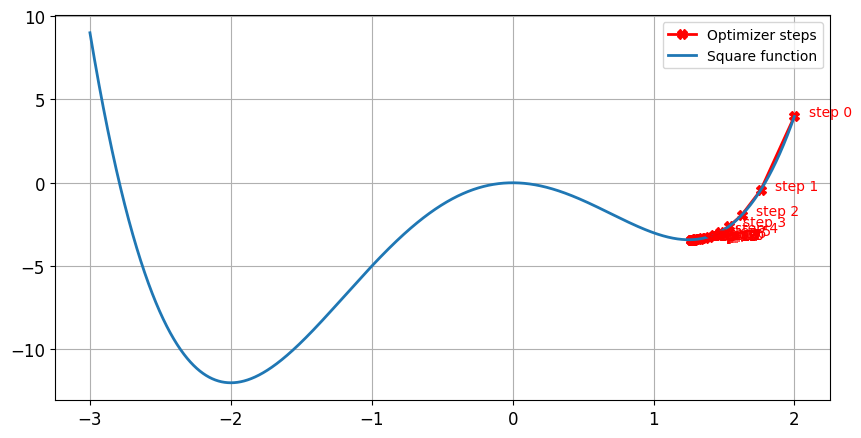

In [37]:
# Try a first value for momentum
mom0 = 0
optimize_and_plot(momentum=mom0)

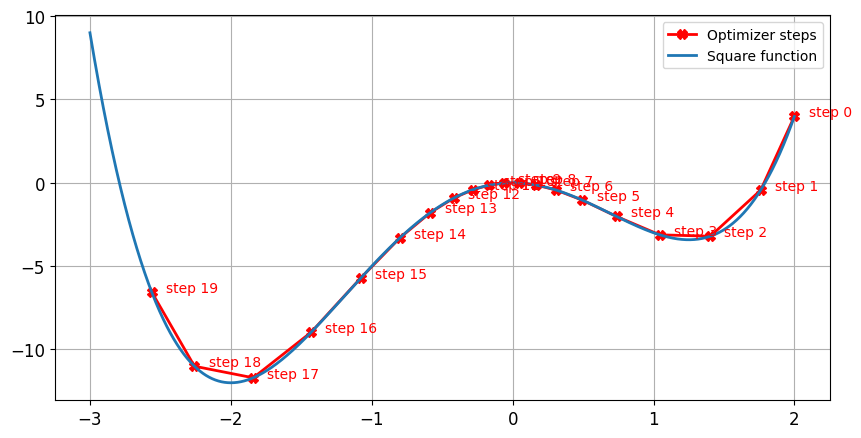

In [38]:
# Try a second value for momentum
mom1 = 0.925 # values between 0.92 and 0.99
optimize_and_plot(momentum=mom1)

Momentum and learning rate are critical to the training of your neural network. A good rule of thumb is to start with a learning rate of ``0.001`` and a momentum of ``0.95``.